In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1.DATASET

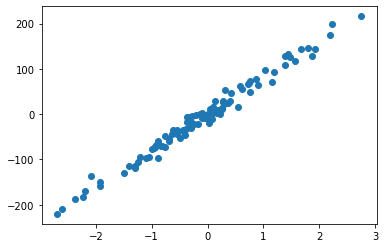

In [2]:
x , y = make_regression(n_samples=100 , n_features=1 , noise=10)
plt.scatter(x , y)

In [3]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
print(x.shape)
y = y.reshape(y.shape[0] , 1)
print(y.shape)

(100, 1)
(100, 1)


In [8]:
#La Matrice X
X=np.hstack((x , np.ones(x.shape)))
X.shape

(100, 2)

array([[ 1.05502282e-01,  1.00000000e+00],
       [-4.43698933e-01,  1.00000000e+00],
       [-7.65975230e-01,  1.00000000e+00],
       [-6.16084179e-01,  1.00000000e+00],
       [-3.72461549e-01,  1.00000000e+00],
       [-1.30764523e+00,  1.00000000e+00],
       [-8.17395570e-01,  1.00000000e+00],
       [-2.96852542e-01,  1.00000000e+00],
       [-6.39536674e-01,  1.00000000e+00],
       [ 2.53475980e-01,  1.00000000e+00],
       [ 1.79204426e+00,  1.00000000e+00],
       [-1.24287386e+00,  1.00000000e+00],
       [-3.82773336e-01,  1.00000000e+00],
       [-3.21065820e-01,  1.00000000e+00],
       [ 3.11814392e-02,  1.00000000e+00],
       [-6.98702518e-01,  1.00000000e+00],
       [ 1.86271408e+00,  1.00000000e+00],
       [ 9.79858508e-02,  1.00000000e+00],
       [-8.91631757e-01,  1.00000000e+00],
       [ 2.79204413e-01,  1.00000000e+00],
       [-2.61228133e+00,  1.00000000e+00],
       [-5.41661979e-01,  1.00000000e+00],
       [-1.50139743e+00,  1.00000000e+00],
       [ 3.

In [10]:
#Vecteur Theta
theta = np.random.randn(2,1)
theta.shape

(2, 1)

In [11]:
theta

array([[-0.52777576],
       [ 0.48279447]])

# 2.MODELE

In [12]:
def model (X , theta):
    return X.dot(theta)

In [13]:
model(X , theta)

array([[ 0.42711292],
       [ 0.71696801],
       [ 0.88705763],
       [ 0.80794877],
       [ 0.67937065],
       [ 1.17293793],
       [ 0.91419604],
       [ 0.63946605],
       [ 0.82032643],
       [ 0.34901599],
       [-0.46300305],
       [ 1.13875317],
       [ 0.68481296],
       [ 0.65224523],
       [ 0.46633766],
       [ 0.85155273],
       [-0.50030087],
       [ 0.43107991],
       [ 0.9533761 ],
       [ 0.33543715],
       [ 1.86149324],
       [ 0.76867053],
       [ 1.27519565],
       [ 0.31612827],
       [ 0.35114735],
       [ 1.65733472],
       [ 0.6259901 ],
       [ 0.08426635],
       [ 0.28605044],
       [ 1.58201432],
       [ 0.9818166 ],
       [-0.69239022],
       [ 0.59391325],
       [ 0.26079597],
       [ 0.96818543],
       [-0.12775108],
       [-0.67767081],
       [ 0.46442077],
       [-0.3978911 ],
       [ 0.09849548],
       [ 1.06587258],
       [-0.34739938],
       [ 0.0959827 ],
       [ 0.77349649],
       [ 0.53580156],
       [ 1

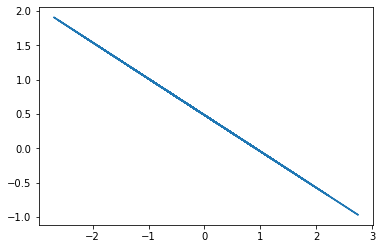

In [17]:
plt.plot(x , model(X , theta))

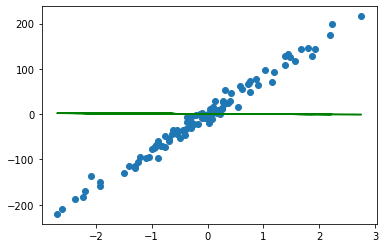

In [24]:
plt.scatter(x , y)
plt.plot(x , model(X , theta), c = "g")

# 3.FONCTION COUP

In [45]:
def cost_function(X , y , theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X , theta) - y) **2) 


In [46]:
cost_function(X , y , theta)

3953.5984508267834

# 4.GRADIENTS ET DESCENTE DE GRADIENT

In [91]:
def grad(X , y , theta):
    m=len(y)
    return 1/m * X.T.dot(model(X , theta) - y)

In [92]:
def gradient_descent(X , y , theta , learning_rate , n_iterations):
    
    for i in range (0 , n_iterations):
        theta = theta - learning_rate * grad(X , y , theta)
    return theta

# 5.MACHINE LEARNING

In [93]:
theta_final = gradient_descent(X , y , theta , learning_rate = 0.01 , n_iterations = 10000)

In [94]:
theta_final

array([[80.42083953],
       [ 0.3841033 ]])

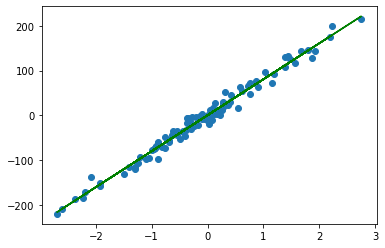

In [95]:
predictions = model(X , theta_final)
plt.scatter(x , y)
plt.plot(x , predictions , c = 'g')

# 6.MINIMISATION DE LA FONCTION COUP AVEC LE NOMBRE D'ITERATIONS (COURBE D'APPRENTISSAGE)

In [96]:
def gradient_descent(X , y , theta , learning_rate , n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range (0 , n_iterations):
        theta = theta - learning_rate * grad(X , y , theta)
        cost_history[i] = cost_function(X , y , theta)
    return theta, cost_history

In [97]:
theta_final , cost_history = gradient_descent(X , y , theta , learning_rate = 0.01 , n_iterations = 1000)

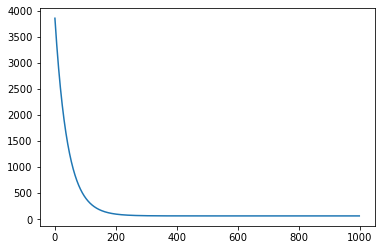

In [98]:
plt.plot(range(1000) , cost_history)

# 7.COEFFICIENT DE DETERMINATION (PERFORMENCE DU MODELE)

Pour évaluer la performence d'un modèle de régression linéaire, on peut utliser le coefficient de détermination.

$$R^2 = 1 - \frac{\sum(y-f(x))^2}{\sum(y-\overline y)^2}$$

In [99]:
def coef_determination(y , pred):
    u = ((y-pred) ** 2).sum()
    v = ((y-y.mean()) ** 2).sum()
    return 1-u/v

In [100]:
coef_determination(y , predictions)

0.9831250157533132